<a href="https://colab.research.google.com/github/Kevin-Wang-McGill/USA-Housing-Price-Prediction/blob/main/Housing_Price_Regression_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

**Kevin's End-to-end Machine Learning project**

***Welcome to Kevin's project!***

# Project Overview

This project aims to develop a machine learning model for predicting residential property prices in the United States real estate market. By analyzing various property features and market indicators, we seek to create an accurate price prediction system.

## Data Description

Our dataset comprises 22,681 property listings with 14 key features including:



*   Physical attributes (bedrooms, bathrooms, area)
*   Location data (state, city, coordinates)
*   Market indicators (price per square foot, market estimates)
*   Rental potential indicators



## Project Goals



1.   Apply Data Science Lifecycle methodology to develop a regression model for housing price prediction
2.   Perform comprehensive data analysis and feature engineering on property attributes
3.   Build and evaluate multiple regression models to identify the most effective approach
4.   Create a practical tool that helps predict property values based on listing details



# Version Check

This project requires Python 3.7 or above:

In [303]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [304]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Import  Basic libraries

In [306]:
import re
from urllib.request import urlopen
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rich import print
from scipy import stats
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.exceptions import NotFittedError
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm


# Get the Data

## Read the Data

In [307]:
from google.colab import drive
drive.mount('/content/drive')
housing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/McGill - ML 1/usa_housing_price_df.csv")
print(f"Data loaded: {len(housing)} records")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data loaded: 22681 records

## Take a Quick Look at the Data Structure

In [308]:
housing.head()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0


In [309]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  float64
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
dtypes: float64(11), object(3)
memory usage: 2.4+ MB


In [310]:
housing.describe()

,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
count,22681.000000,22667.000000,22647.000000,22681.000000,22681.000000,21779.000000,1.544500e+04,16705.000000,22681.000000,22681.000000,2.268100e+04
mean,50023.455403,3.393435,2.423299,2128.138398,222.641994,2.354870,4.870383e+05,2624.699192,39.751686,-92.299353,5.324399e+05
std,29570.312497,1.050506,1.157670,1577.512556,202.811788,16.128371,1.155986e+06,4029.614920,5.694751,16.866820,1.574922e+06
min,1002.000000,0.000000,0.000000,120.000000,1.925926,0.000000,1.570000e+04,100.000000,25.449816,-161.772780,4.888000e+03
25%,25419.000000,3.000000,2.000000,1400.000000,132.729544,0.173439,2.306000e+05,1641.000000,35.938618,-103.317760,2.250000e+05
50%,50703.000000,3.000000,2.000000,1849.000000,184.122149,0.299449,3.417000e+05,2149.000000,39.938480,-89.185210,3.449000e+05
75%,74134.000000,4.000000,3.000000,2466.000000,257.118205,0.930000,4.995000e+05,2800.000000,42.936455,-79.108376,4.999000e+05
max,99950.000000,21.000000,25.000000,99990.000000,6117.071334,800.000000,7.195920e+07,212834.000000,65.044370,-67.016030,7.600000e+07


# Object columns analysis & Data Cleaning

**Initially, I planned to use geographical clustering for location analysis in the housing dataset. However, due to the large dataset size (22,681 entries), visualization would be ineffective. Instead, I adopted the 2020 US Census Bureau's classification system, which provides a more structured approach by categorizing locations into regions (Northeast, Midwest, South, West) and city sizes based on population data. This standardized method improves interpretability while maintaining data integrity for our analysis.**

## A quick look for columns

In [311]:
display(housing["State"].value_counts())
display(housing["City"].value_counts())
display(housing["Street"].value_counts())

,count
State,
CT,499
MI,496
NH,495
IN,495
CA,494
AZ,492
MO,492
VA,491
ME,491


,count
City,
Lincoln,237
Las Vegas,223
Albuquerque,111
Kansas City,104
Anchorage,101
...,...
Grandy,1
Kelsey,1
Tenstrike,1


,count
Street,
Main St,44
Main Street,41
S Main St,25
N Main St,21
E Main St,18
...,...
Airport Dr,1
Robin Hood Dr,1
Grey Eagle Dr,1


## Define state-classification function

In [312]:
import pandas as pd
import numpy as np

def transform_housing_data(df):
    # Region mapping according to US Census Bureau classification
    region_mapping = {
        # Northeast states
        'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
        'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast',
        'PA': 'Northeast',
        # Midwest states
        'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest',
        'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
        'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
        # South states
        'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South',
        'WV': 'South', 'NC': 'South', 'SC': 'South', 'GA': 'South',
        'FL': 'South', 'KY': 'South', 'TN': 'South', 'AL': 'South',
        'MS': 'South', 'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',
        # West states
        'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West',
        'NM': 'West', 'AZ': 'West', 'UT': 'West', 'NV': 'West',
        'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West'
    }

    # Add region column based on state mapping
    df['Region'] = df['State'].map(region_mapping)

    return df

# Apply transformation
housing_transformed = transform_housing_data(housing)
display(housing_transformed)
housing_transformed.info()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,Region
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0,South
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0,South
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0,South
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0,South
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22676,WY,Burns,Road 210a,82053.0,2.0,1.0,1112.0,337.230216,20.0000,368600.0,1500.0,41.149517,-104.439620,375000.0,West
22677,WY,Cody,Lincoln Ave,82414.0,2.0,3.0,1232.0,241.801948,0.0300,NaN,NaN,44.524570,-109.033844,297900.0,West
22678,WY,Dubois,Mason Dr,82513.0,2.0,2.0,2016.0,262.896825,1.4200,NaN,2294.0,43.521640,-109.594050,530000.0,West
22679,WY,Cheyenne,Carolina Rd,82009.0,3.0,2.0,2930.0,196.552901,6.2300,558000.0,2749.0,41.138450,-105.052790,575900.0,West


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  float64
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
 14  Region          22681 non-null  object 
dtypes: float64(11), object(4)
memory usage: 2.6+ MB


## Define city-classification function

In [313]:
import pandas as pd

def get_complete_city_classification():

   city_classifications = {
       # Large cities (based on 2020 Census data)
       'New York': 'Large',
       'Los Angeles': 'Large',
       'Chicago': 'Large',
       'Houston': 'Large',
       'Phoenix': 'Large',
       'Philadelphia': 'Large',
       'San Antonio': 'Large',
       'San Diego': 'Large',
       'Dallas': 'Large',
       'San Jose': 'Large',
       'Jacksonville': 'Large',
       'San Francisco': 'Large',
       'Austin': 'Large',
       'Fort Worth': 'Large',
       'Columbus': 'Large',
       'Indianapolis': 'Large',
       'Charlotte': 'Large',
       'Seattle': 'Large',
       'Denver': 'Large',
       'Washington': 'Large',
       'Boston': 'Large',
       'El Paso': 'Large',
       'Nashville': 'Large',
       'Detroit': 'Large',
       'Oklahoma City': 'Large',
       'Portland': 'Large',
       'Las Vegas': 'Large',
       'Memphis': 'Large',
       'Louisville': 'Large',
       'Baltimore': 'Large',
       'Milwaukee': 'Large',
       'Albuquerque': 'Large',
       'Tucson': 'Large',
       'Fresno': 'Large',
       'Sacramento': 'Large',
       'Atlanta': 'Large',
       'Kansas City': 'Large',
       'Miami': 'Large',
       'Raleigh': 'Large',
       'Minneapolis': 'Large',
       'Cleveland': 'Large',
       'Tulsa': 'Large',
       'Oakland': 'Large',
       'Tampa': 'Large',
       'Aurora': 'Large',

       # Medium cities
       'Bellevue': 'Medium',
       'Berkeley': 'Medium',
       'Bloomington': 'Medium',
       'Boulder': 'Medium',
       'Cambridge': 'Medium',
       'Evanston': 'Medium',
       'Fort Collins': 'Medium',
       'Green Bay': 'Medium',
       'Norman': 'Medium',
       'Palo Alto': 'Medium',
       'Provo': 'Medium',
       'Santa Cruz': 'Medium',
       'Stamford': 'Medium',
       'Syracuse': 'Medium',
       'West Palm Beach': 'Medium',
       'Ann Arbor': 'Medium',
       'Albany': 'Medium',
       'Asheville': 'Medium',
       'Boise': 'Medium',
       'Charleston': 'Medium',
       'Eugene': 'Medium',
       'Fort Lauderdale': 'Medium',
       'Gainesville': 'Medium',
       'Hartford': 'Medium',
       'Lincoln': 'Medium',
       'Madison': 'Medium',
       'New Haven': 'Medium',
       'Providence': 'Medium',
       'Reno': 'Medium',
       'Richmond': 'Medium',
       'Spokane': 'Medium',
       'Tacoma': 'Medium',
       'Tempe': 'Medium',
       'Winston-Salem': 'Medium',
       'Worcester': 'Medium',
       'Anchorage': 'Medium',
       'Cheyenne': 'Medium',
       'Rapid City': 'Medium',
       'Wasilla': 'Medium',
       'Wichita': 'Medium',
       'Wilmington': 'Medium',


       'default': 'Small'  # All unlisted cities default to small
   }

   return city_classifications

def classify_city_size(df):
   """
   Classify cities by size
   Parameters:
       df: DataFrame containing City column
   Returns:
       DataFrame with added CitySize column
   """
   # Get city classification dictionary
   city_classifications = get_complete_city_classification()

   # Create classification function
   def get_city_size(city):
       return city_classifications.get(city, city_classifications['default'])

   # Add CitySize column
   df['CitySize'] = df['City'].apply(get_city_size)

   # Print classification statistics
   print("City Size Distribution:")
   print(df['CitySize'].value_counts())

   return df

housing_transformed = classify_city_size(housing_transformed)
display(housing_transformed)
housing_transformed.info()

City Size Distribution:

CitySize
Small     19522
Large      1789
Medium     1370
Name: count, dtype: int64

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,Region,CitySize
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0,South,Small
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0,South,Small
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0,South,Small
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0,South,Small
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0,South,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22676,WY,Burns,Road 210a,82053.0,2.0,1.0,1112.0,337.230216,20.0000,368600.0,1500.0,41.149517,-104.439620,375000.0,West,Small
22677,WY,Cody,Lincoln Ave,82414.0,2.0,3.0,1232.0,241.801948,0.0300,NaN,NaN,44.524570,-109.033844,297900.0,West,Small
22678,WY,Dubois,Mason Dr,82513.0,2.0,2.0,2016.0,262.896825,1.4200,NaN,2294.0,43.521640,-109.594050,530000.0,West,Small
22679,WY,Cheyenne,Carolina Rd,82009.0,3.0,2.0,2930.0,196.552901,6.2300,558000.0,2749.0,41.138450,-105.052790,575900.0,West,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  float64
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
 14  Region          22681 non-null  object 
 15  CitySize        22681 non-null  object 
dtypes: float64(11), object(5)
memory usage: 2.8+ MB


## Dropping Abundant columns


In [314]:
columns_to_drop = ['State', 'City', 'Street', 'Zipcode']
housing_cleaned = housing_transformed.drop(columns=columns_to_drop)

display(housing_cleaned)
housing_cleaned.info()

,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,Region,CitySize
0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0,South,Small
1,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0,South,Small
2,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0,South,Small
3,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0,South,Small
4,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0,South,Small
...,...,...,...,...,...,...,...,...,...,...,...,...
22676,2.0,1.0,1112.0,337.230216,20.0000,368600.0,1500.0,41.149517,-104.439620,375000.0,West,Small
22677,2.0,3.0,1232.0,241.801948,0.0300,NaN,NaN,44.524570,-109.033844,297900.0,West,Small
22678,2.0,2.0,2016.0,262.896825,1.4200,NaN,2294.0,43.521640,-109.594050,530000.0,West,Small
22679,3.0,2.0,2930.0,196.552901,6.2300,558000.0,2749.0,41.138450,-105.052790,575900.0,West,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedroom         22667 non-null  float64
 1   Bathroom        22647 non-null  float64
 2   Area            22681 non-null  float64
 3   PPSq            22681 non-null  float64
 4   LotArea         21779 non-null  float64
 5   MarketEstimate  15445 non-null  float64
 6   RentEstimate    16705 non-null  float64
 7   Latitude        22681 non-null  float64
 8   Longitude       22681 non-null  float64
 9   ListedPrice     22681 non-null  float64
 10  Region          22681 non-null  object 
 11  CitySize        22681 non-null  object 
dtypes: float64(10), object(2)
memory usage: 2.1+ MB


## Drop Na

***We initially attempted to impute missing values in MarketEstimate and RentEstimate by grouping cities and using their median values. However, this approach showed poor fitting results due to high variance in property values within cities. While considering a ratio-based imputation using ListedPrice, we recognized this would lead to target variable leakage since ListedPrice is strongly correlated with our prediction targets. Therefore, we decided to drop rows with missing values to maintain data integrity and prevent model bias.***

In [315]:
housing = housing_cleaned.dropna()

print(f"Original dataset size: {len(housing_cleaned)}")
print(f"Dataset size after dropping missing values: {len(housing)}")

Original dataset size: 22681

Dataset size after dropping missing values: 14853

# The Stastical analysis

## images on different predictpors

In [316]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

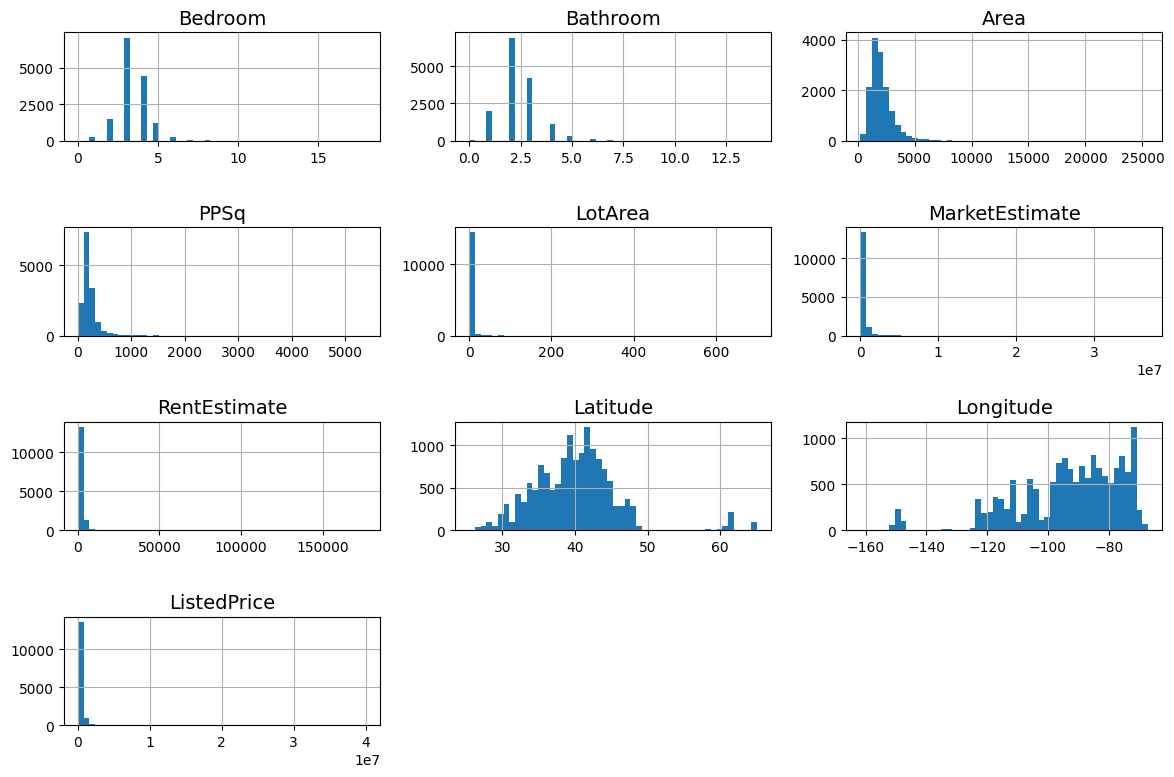

In [317]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

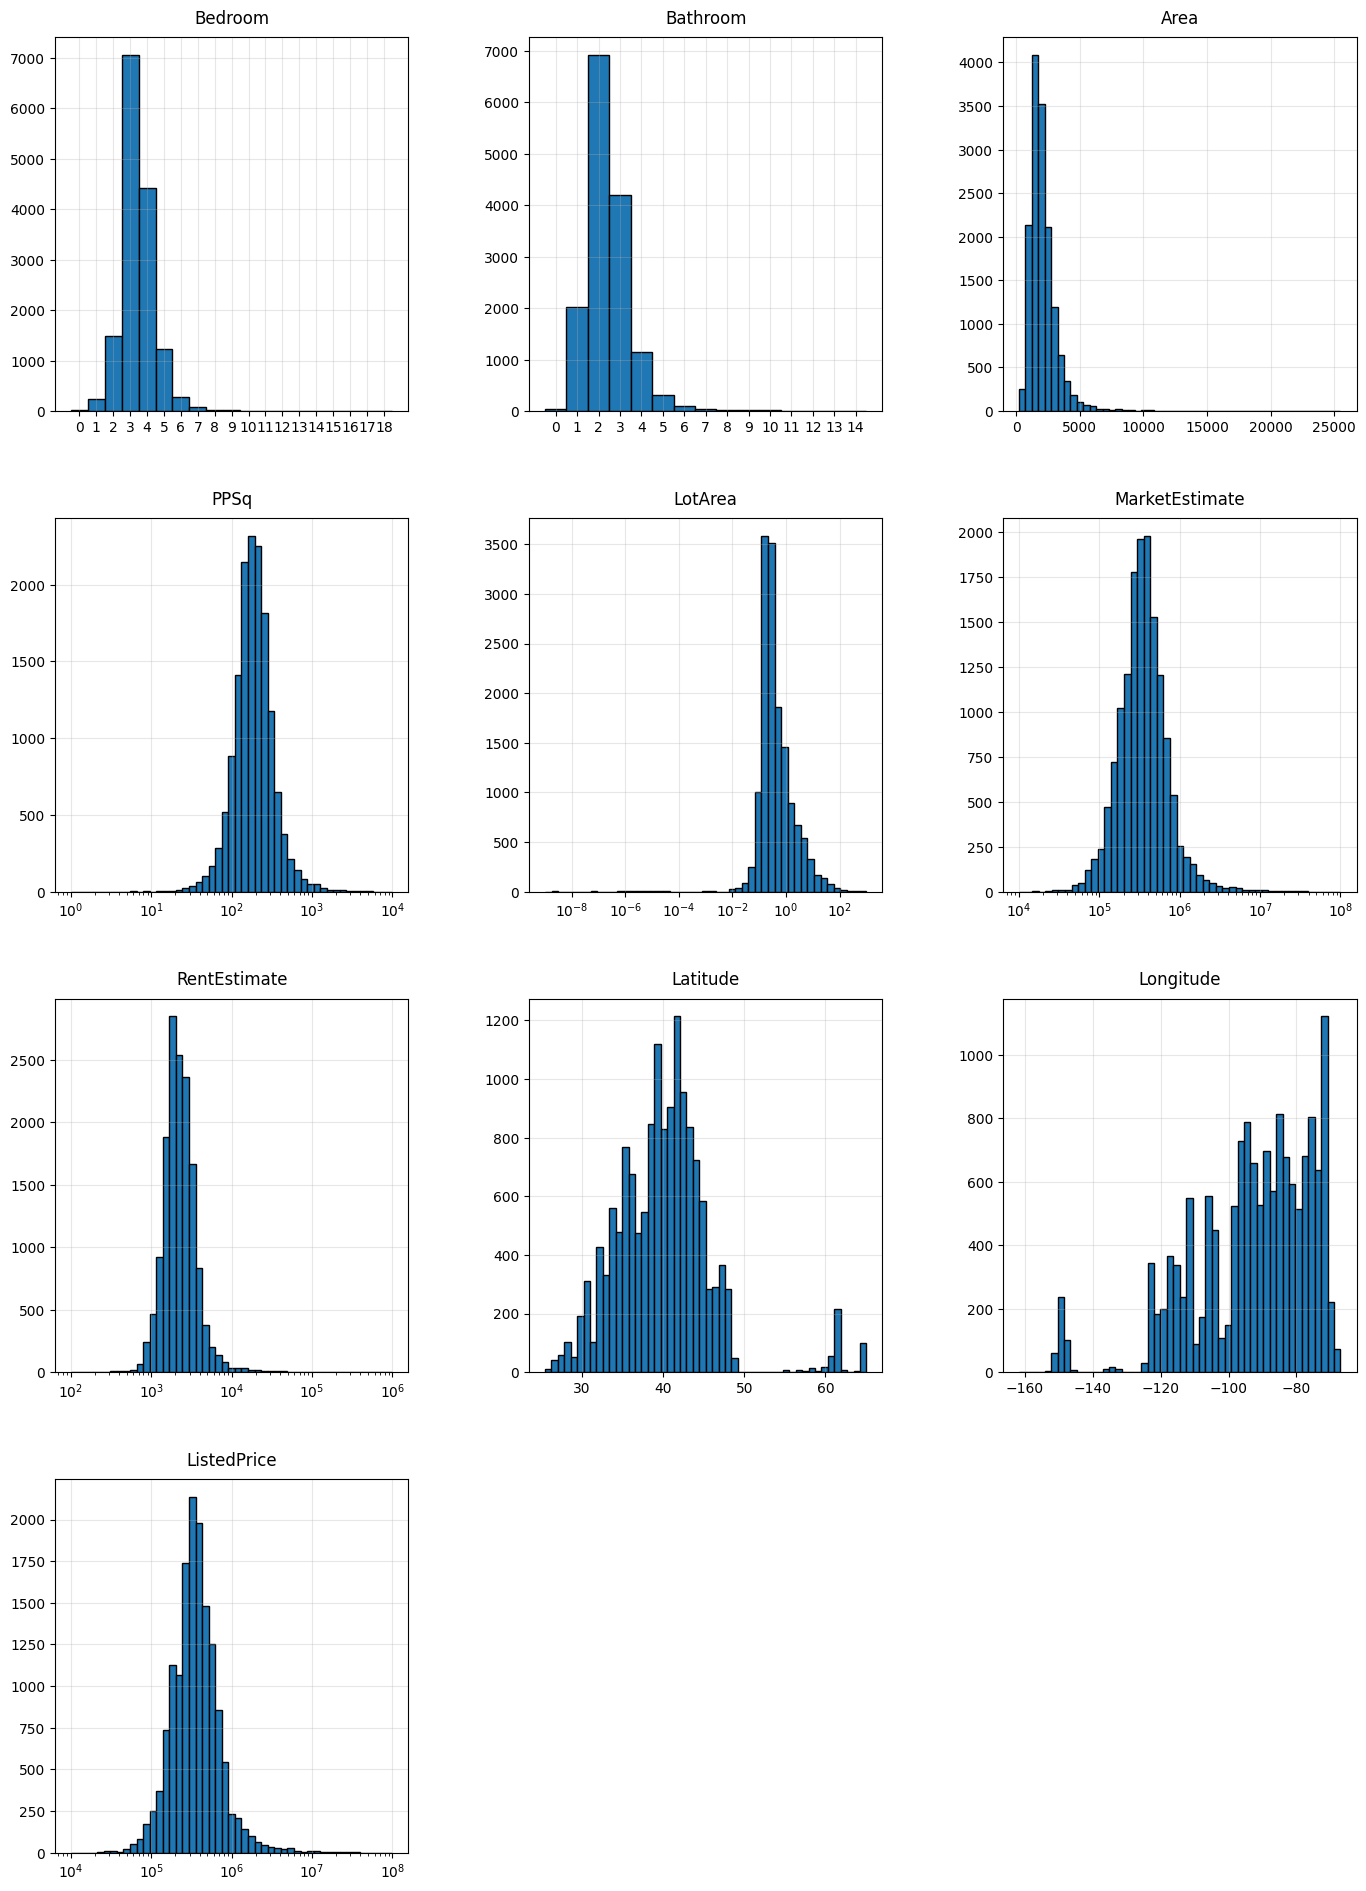

In [318]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.tight_layout(pad=4.0)

# Get numerical columns
numeric_cols = [col for col in housing.columns if housing[col].dtype in ['float64', 'int64']]

# Plot histograms
for i, col in enumerate(numeric_cols):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]

    if col in ['ListedPrice', 'MarketEstimate', 'RentEstimate', 'PPSq', 'LotArea']:
        # Apply log transformation for price and area related features
        data = housing[col][housing[col] > 0]  # Ensure positive values
        log_data = np.log10(data)
        min_val = np.floor(log_data.min())
        max_val = np.ceil(log_data.max())
        bins = np.logspace(min_val, max_val, 50)
        ax.hist(data, bins=bins, edgecolor='black')
        ax.set_xscale('log')
    elif col in ['Bedroom', 'Bathroom']:
        # Use integer bins for discrete values like rooms
        max_val = int(housing[col].max())
        min_val = int(housing[col].min())
        bins = range(min_val, max_val + 2)
        ax.hist(housing[col], bins=bins, edgecolor='black', align='left')
        ax.set_xticks(range(min_val, max_val + 1))
    else:
        ax.hist(housing[col], bins=50, edgecolor='black')

    ax.set_title(col, fontsize=12, pad=10)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=10)

# Remove extra subplots if any
if len(numeric_cols) < 12:
    for i in range(len(numeric_cols), 12):
        fig.delaxes(axes[i // 3, i % 3])

plt.show()

## Create a Test Set

In [323]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)
len(test_set)
np.random.seed(42)
housing = train_set.copy() # Call the copy method with parentheses

TypeError: object of type 'method' has no len()

# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

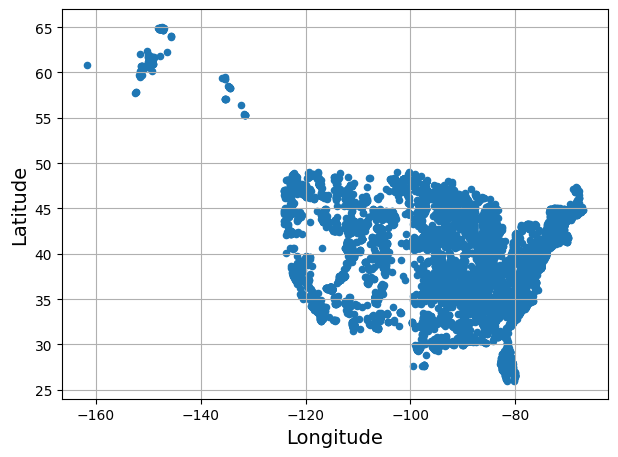

In [248]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

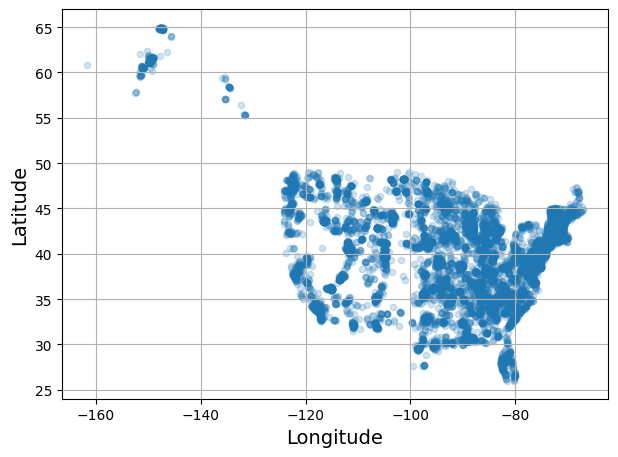

In [249]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

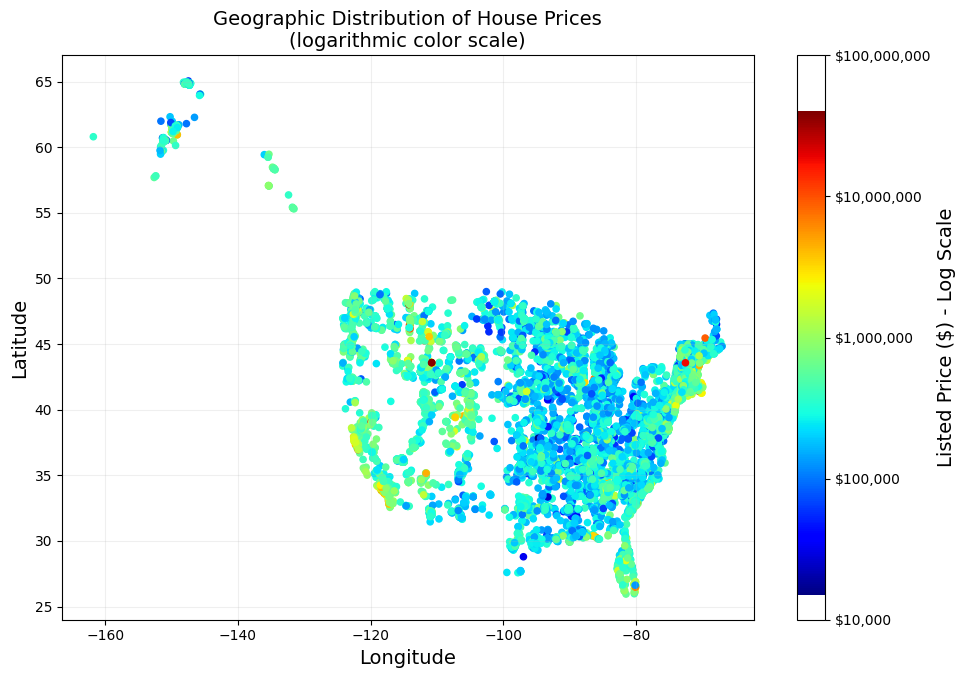

In [250]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis objects
plt.figure(figsize=(10, 7))

# Get the price data and transform it to log scale for coloring
prices = housing['ListedPrice']
log_prices = np.log10(prices)

# Create scatter plot with log-scaled colors
scatter = plt.scatter(housing['Longitude'],
                     housing['Latitude'],
                     c=log_prices,  # Use log-transformed prices for coloring
                     cmap='jet',
                     s=20)

# Customize the plot appearance
plt.grid(True, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of House Prices\n(logarithmic color scale)')

# Add colorbar with custom ticks
cbar = plt.colorbar(scatter)
cbar.set_label('Listed Price ($) - Log Scale')

# Create custom colorbar ticks at each order of magnitude
log_min = np.floor(log_prices.min())
log_max = np.ceil(log_prices.max())
tick_positions = np.arange(log_min, log_max + 1)
tick_labels = ['${:,.0f}'.format(10**x) for x in tick_positions]
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)

plt.tight_layout()
plt.show()

## Looking for Correlations

Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [251]:
corr_matrix = housing.corr(numeric_only=True)

In [252]:
corr_matrix["ListedPrice"].sort_values(ascending=False)

,ListedPrice
ListedPrice,1.000000
MarketEstimate,0.992039
RentEstimate,0.917957
PPSq,0.676082
Area,0.541350
Bathroom,0.457096
Bedroom,0.241802
LotArea,0.156004
Latitude,0.018078
Longitude,-0.056185


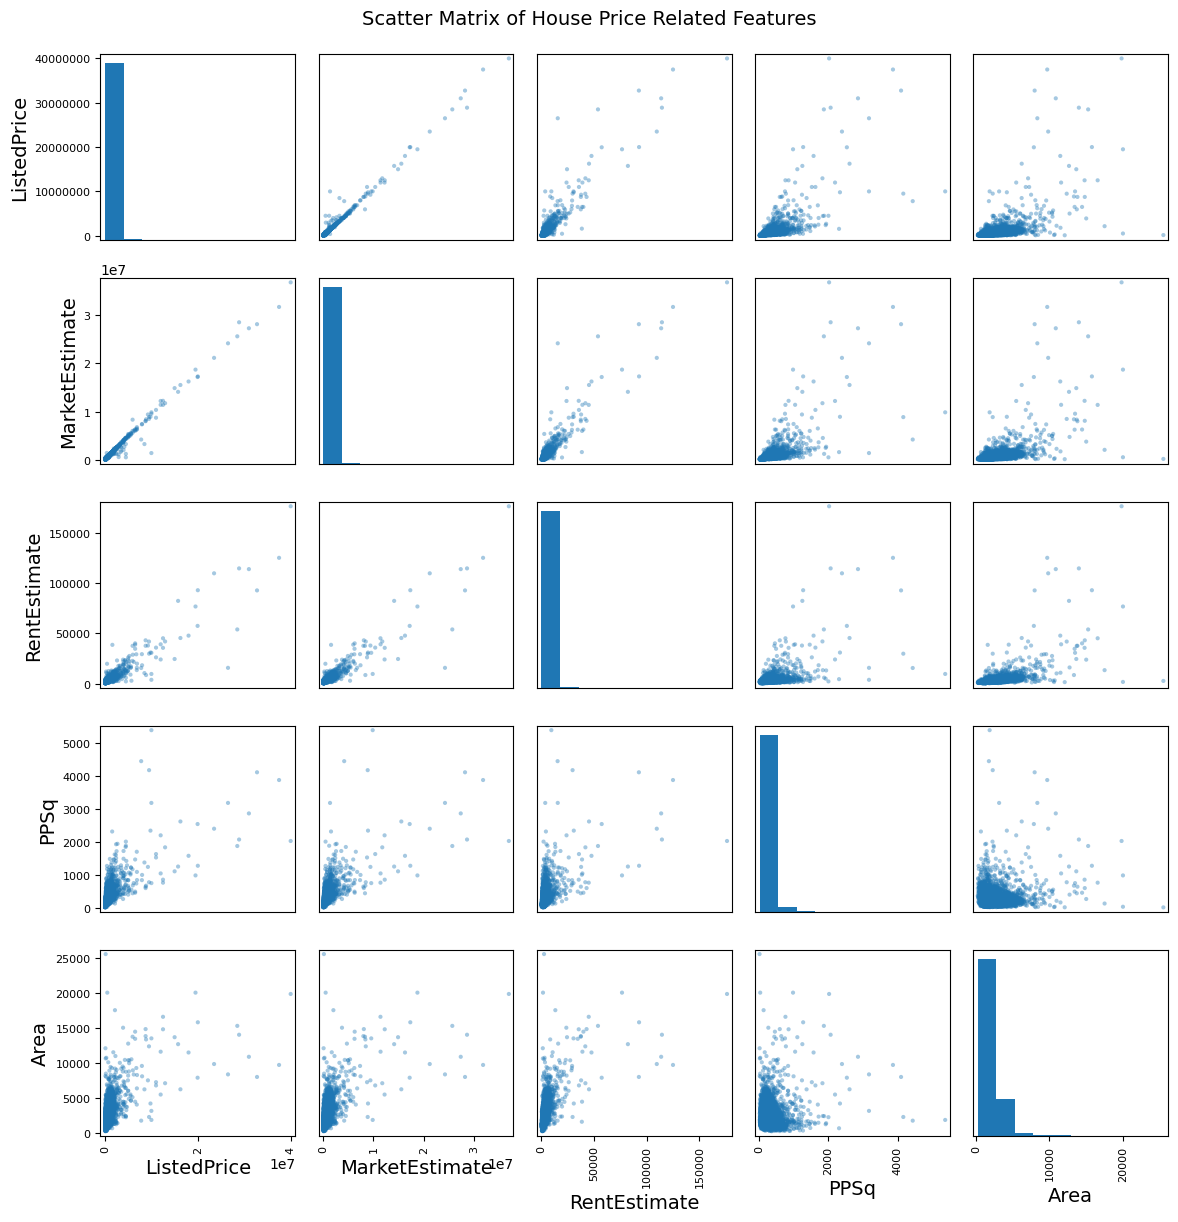

In [253]:

attributes = ["ListedPrice", "MarketEstimate", "RentEstimate", "PPSq", "Area"]

scatter_matrix(housing[attributes],
              figsize=(12, 12),
              diagonal='hist',
              alpha=0.4,
              grid=True)
plt.tight_layout()

plt.suptitle('Scatter Matrix of House Price Related Features',
            y=1.02,
            fontsize=14)

plt.show()

# Price Premium Ratio Analysis


## Premium Ratio Correlation Analysis



In [173]:
#housing = pd.DataFrame(housing)
#housing["PremiumRatio"] = ((housing["ListedPrice"] - housing["MarketEstimate"]) / housing["MarketEstimate"]) * 100


In [206]:
#corr_matrix = housing.corr(numeric_only=True)
#corr_matrix["PremiumRatio"].sort_values(ascending=False)


# Experimenting with Attribute Combinations

In [254]:
# Building area to lot area ratio
housing['area_ratio'] = housing['Area'] / housing['LotArea']

# Average area per bedroom
housing['area_per_bedroom'] = housing['Area'] / housing['Bedroom']

# Bathroom to bedroom ratio
housing['bath_bed_ratio'] = housing['Bathroom'] / housing['Bedroom']

# Estimated rent per square foot
housing['rent_per_sqft'] = housing['RentEstimate'] / housing['Area']

# Annual rental return rate (%)
housing['rent_return_ratio'] = (housing['RentEstimate'] * 12) / housing['ListedPrice'] * 100

In [255]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["ListedPrice"].sort_values(ascending=False)

,ListedPrice
ListedPrice,1.000000
MarketEstimate,0.992039
RentEstimate,0.917957
PPSq,0.676082
Area,0.541350
Bathroom,0.457096
rent_per_sqft,0.449629
area_per_bedroom,0.386542
bath_bed_ratio,0.254961
Bedroom,0.241802


# Prepare the Data for Machine Learning Algorithms

## Handling Text and Categorical Attributes

Continue on handling the Region and CitySize

In [256]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Encode Region and CitySize
categorical_features = ['Region', 'CitySize']
encoded_features = encoder.fit_transform(housing[categorical_features])

# Get feature names for encoded columns
feature_names = []
for i, feature in enumerate(categorical_features):
    feature_names.extend([f"{feature}_{cat}" for cat in encoder.categories_[i]])

# Create DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=housing.index)

# Combine encoded features with original DataFrame
housing = pd.concat([housing.drop(columns=categorical_features), encoded_df], axis=1)

display(housing)
housing.info()

,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,...,bath_bed_ratio,rent_per_sqft,rent_return_ratio,Region_Midwest,Region_Northeast,Region_South,Region_West,CitySize_Large,CitySize_Medium,CitySize_Small
22367,3.0,2.0,1456.0,295.260989,0.405854,426600.0,1999.0,44.574510,-106.898670,429900.0,...,0.666667,1.372940,5.579902,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6631,5.0,4.0,3561.0,358.045493,0.640000,1208700.0,7971.0,41.579033,-93.676610,1275000.0,...,0.800000,2.238416,7.502118,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15682,4.0,2.0,1479.0,131.845842,0.179100,202200.0,1250.0,41.645370,-83.470955,195000.0,...,0.500000,0.845166,7.692308,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16871,4.0,1.0,1381.0,271.542361,0.081612,373900.0,2299.0,39.842690,-75.711060,375000.0,...,0.250000,1.664736,7.356800,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13886,4.0,2.0,1610.0,177.018634,0.190000,277300.0,2100.0,35.103157,-106.580100,285000.0,...,0.500000,1.304348,8.842105,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,4.0,2.0,2174.0,206.945722,1.660000,450300.0,3214.0,39.358590,-77.269950,449900.0,...,0.500000,1.478381,8.572572,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20683,3.0,2.0,3012.0,182.569721,1.239700,481900.0,2700.0,38.640020,-77.543940,549900.0,...,0.666667,0.896414,5.891980,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8906,3.0,2.0,1732.0,187.644342,0.189164,325100.0,2045.0,39.636640,-77.412300,325000.0,...,0.666667,1.180716,7.550769,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1548,5.0,3.0,3120.0,144.198718,0.360009,456900.0,3007.0,35.891270,-90.645060,449900.0,...,0.600000,0.963782,8.020449,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
Index: 11883 entries, 22367 to 11267
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bedroom            11883 non-null  float64
 1   Bathroom           11883 non-null  float64
 2   Area               11883 non-null  float64
 3   PPSq               11883 non-null  float64
 4   LotArea            11883 non-null  float64
 5   MarketEstimate     11883 non-null  float64
 6   RentEstimate       11883 non-null  float64
 7   Latitude           11883 non-null  float64
 8   Longitude          11883 non-null  float64
 9   ListedPrice        11883 non-null  float64
 10  area_ratio         11883 non-null  float64
 11  area_per_bedroom   11883 non-null  float64
 12  bath_bed_ratio     11875 non-null  float64
 13  rent_per_sqft      11883 non-null  float64
 14  rent_return_ratio  11883 non-null  float64
 15  Region_Midwest     11883 non-null  float64
 16  Region_Northeast   1188

## Feature Scaling

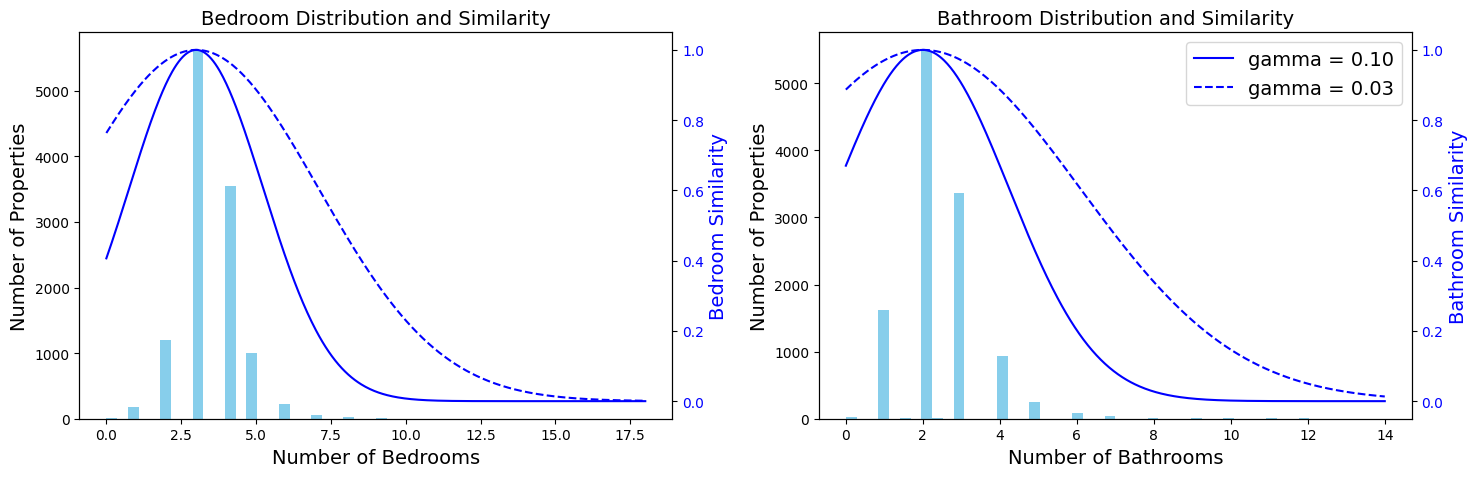

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

# Create subplots for bedroom and bathroom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bedroom analysis
bed_range = np.linspace(housing["Bedroom"].min(),
                       housing["Bedroom"].max(),
                       500).reshape(-1, 1)
reference_bed = [[housing["Bedroom"].median()]]
rbf1_bed = rbf_kernel(bed_range, reference_bed, gamma=0.1)
rbf2_bed = rbf_kernel(bed_range, reference_bed, gamma=0.03)

# Bathroom analysis
bath_range = np.linspace(housing["Bathroom"].min(),
                        housing["Bathroom"].max(),
                        500).reshape(-1, 1)
reference_bath = [[housing["Bathroom"].median()]]
rbf1_bath = rbf_kernel(bath_range, reference_bath, gamma=0.1)
rbf2_bath = rbf_kernel(bath_range, reference_bath, gamma=0.03)

# Plot Bedroom
ax1_twin = ax1.twinx()
ax1.hist(housing["Bedroom"], bins=50, color='skyblue')
ax1.set_xlabel("Number of Bedrooms")
ax1.set_ylabel("Number of Properties")

ax1_twin.plot(bed_range, rbf1_bed, color='blue', label="gamma = 0.10")
ax1_twin.plot(bed_range, rbf2_bed, color='blue', label="gamma = 0.03", linestyle="--")
ax1_twin.set_ylabel("Bedroom Similarity", color='blue')
ax1_twin.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Bedroom Distribution and Similarity")

# Plot Bathroom
ax2_twin = ax2.twinx()
ax2.hist(housing["Bathroom"], bins=50, color='skyblue')
ax2.set_xlabel("Number of Bathrooms")
ax2.set_ylabel("Number of Properties")

ax2_twin.plot(bath_range, rbf1_bath, color='blue', label="gamma = 0.10")
ax2_twin.plot(bath_range, rbf2_bath, color='blue', label="gamma = 0.03", linestyle="--")
ax2_twin.set_ylabel("Bathroom Similarity", color='blue')
ax2_twin.tick_params(axis='y', labelcolor='blue')
ax2.set_title("Bathroom Distribution and Similarity")

# Add legend
ax2_twin.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Custom Transformers

To create simple transformers:

In [259]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [260]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

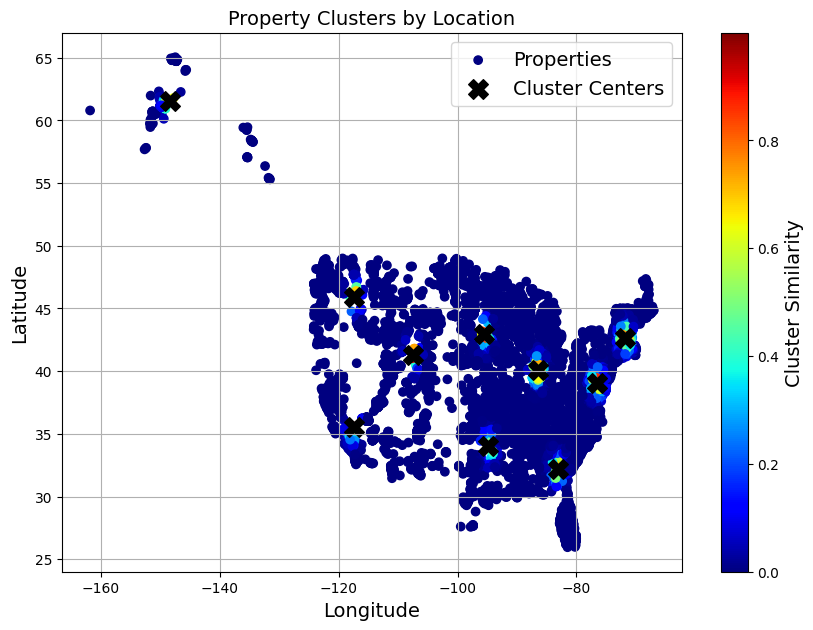

In [261]:
def cluster_and_visualize_locations(data, n_clusters=10, gamma=1.0, random_state=42):
   """
   Cluster locations and create visualization
   """
   # Create clustering model
   cluster_model = ClusterSimilarity(
       n_clusters=n_clusters,
       gamma=gamma,
       random_state=random_state
   )

   # Fit and get similarities
   similarities = cluster_model.fit_transform(
       data[["Latitude", "Longitude"]],
       sample_weight=data["ListedPrice"]
   )

   # Prepare visualization data
   plot_data = data.copy()
   plot_data["Max Cluster Similarity"] = similarities.max(axis=1)

   # Create scatter plot
   plt.figure(figsize=(10, 7))
   scatter = plt.scatter(
       plot_data["Longitude"],
       plot_data["Latitude"],
       c=plot_data["Max Cluster Similarity"],
       cmap="jet",
       label="Properties"
   )

   # Plot cluster centers
   centers = cluster_model.kmeans_.cluster_centers_
   plt.scatter(
       centers[:, 1],
       centers[:, 0],
       color="black",
       marker="X",
       s=200,
       label="Cluster Centers"
   )

   # Customize plot
   plt.grid(True)
   plt.colorbar(scatter, label="Cluster Similarity")
   plt.legend(loc="upper right")
   plt.xlabel("Longitude")
   plt.ylabel("Latitude")
   plt.title("Property Clusters by Location")

   return cluster_model, similarities

model, sims = cluster_and_visualize_locations(housing)
plt.show()

In [262]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

def analyze_clustering(cluster_model, data, similarities):
   """
   Analyze clustering results with key metrics
   """
   # Get cluster labels
   labels = cluster_model.kmeans_.labels_

   # Calculate metrics
   silhouette = silhouette_score(data[["Latitude", "Longitude"]], labels)
   davies = davies_bouldin_score(data[["Latitude", "Longitude"]], labels)

   # Calculate cluster stats
   cluster_sizes = np.bincount(labels)
   cluster_similarities = [similarities[labels == i].mean() for i in range(len(cluster_sizes))]

   # Print results
   print(f"Silhouette Score: {silhouette:.3f}")
   print(f"Davies-Bouldin Index: {davies:.3f}")
   print("\nCluster Statistics:")
   for i in range(len(cluster_sizes)):
       print(f"Cluster {i}: {cluster_sizes[i]} samples, Avg Similarity: {cluster_similarities[i]:.3f}")

# Example usage
analyze_clustering(model, housing, sims)

Silhouette Score: 0.454

Davies-Bouldin Index: 0.690

Cluster Statistics:

Cluster 0: 745 samples, Avg Similarity: 0.001

Cluster 1: 1663 samples, Avg Similarity: 0.020

Cluster 2: 1440 samples, Avg Similarity: 0.001

Cluster 3: 760 samples, Avg Similarity: 0.002

Cluster 4: 1544 samples, Avg Similarity: 0.004

Cluster 5: 335 samples, Avg Similarity: 0.012

Cluster 6: 1351 samples, Avg Similarity: 0.001

Cluster 7: 1534 samples, Avg Similarity: 0.028

Cluster 8: 1320 samples, Avg Similarity: 0.002

Cluster 9: 1191 samples, Avg Similarity: 0.001

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [263]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd

def safe_log(X):
   """
   Safe logarithmic transformation:
   1. Handle negatives: take absolute value before log
   2. Handle zeros: add small constant(1) to avoid log(0)
   """
   return np.log(np.abs(X) + 1)

def inverse_safe_log(X):
   """
   Inverse function for log transform:
   1. Exponential transform
   2. Subtract constant added previously
   """
   return np.exp(X) - 1

# Create transformer
price_transformer = FunctionTransformer(
   safe_log,
   inverse_func=inverse_safe_log,
   validate=True
)

# Columns to transform
price_features = ['ListedPrice', 'MarketEstimate', 'RentEstimate', 'PPSq', 'LotArea']

# Apply transformation
transformed_prices = price_transformer.fit_transform(housing[price_features])

# Create transformed DataFrame
transformed_df = pd.DataFrame(
   transformed_prices,
   columns=[f'{col}_log' for col in price_features],
   index=housing.index
)

# Print statistics
print("Original statistics:")
print(housing[price_features].describe())
print("\nTransformed statistics:")
print(transformed_df.describe())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


Original statistics:

ListedPrice  MarketEstimate   RentEstimate          PPSq       LotArea
count  1.188300e+04    1.188300e+04   11883.000000  11883.000000  11883.000000
mean   4.952687e+05    4.834320e+05    2662.748885    220.165618      2.041192
std    1.098744e+06    1.001558e+06    3837.146729    185.604728     13.498969
min    1.490000e+04    1.570000e+04     155.000000      5.883276      0.000000
25%    2.390000e+05    2.345000e+05    1694.000000    134.529148      0.178053
50%    3.490000e+05    3.436000e+05    2199.000000    184.416703      0.295822
75%    5.042500e+05    5.051000e+05    2876.500000    255.081885      0.900000
max    4.000000e+07    3.687690e+07  176194.000000   5379.236148    700.000000

Transformed statistics:

ListedPrice_log  MarketEstimate_log  RentEstimate_log      PPSq_log  \
count     11883.000000        11883.000000      11883.000000  11883.000000   
mean         12.773816           12.760555          7.717209      5.229194   
std           0.691944            0.692370          0.484888      0.555703   
min           9.609184            9.661480          5.049856      1.929095   
25%          12.384223           12.365215          7.435438      4.909187   
50%          12.762830           12.747236          7.696213      5.222606   
75%          13.130828           13.132514          7.964677      5.545497   
max          17.504390           17.423096         12.079347      8.590488   

        LotArea_log  
count  11883.000000  
mean       0.543267  
std        0.696198  
min        0.000000  
25%        0.163863  
50%        0.259145  
75%        0.641854  
max        6.552508

In [264]:
transformed_df.describe()

,ListedPrice_log,MarketEstimate_log,RentEstimate_log,PPSq_log,LotArea_log
count,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000
mean,12.773816,12.760555,7.717209,5.229194,0.543267
std,0.691944,0.692370,0.484888,0.555703,0.696198
min,9.609184,9.661480,5.049856,1.929095,0.000000
25%,12.384223,12.365215,7.435438,4.909187,0.163863
50%,12.762830,12.747236,7.696213,5.222606,0.259145
75%,13.130828,13.132514,7.964677,5.545497,0.641854
max,17.504390,17.423096,12.079347,8.590488,6.552508


In [265]:
from sklearn.preprocessing import StandardScaler

# Create standard scaler
scaler = StandardScaler()

# Fit and transform log-transformed data
scaled_data = scaler.fit_transform(transformed_df)

# Create scaled DataFrame
scaled_df = pd.DataFrame(
   scaled_data,
   columns=[f'{col}_scaled' for col in transformed_df.columns],
   index=transformed_df.index
)

print("After scaling statistics:")
print(scaled_df.describe())

# For full pipeline:
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
   ('log', price_transformer),
   ('scale', StandardScaler())
])

# Apply complete transformation
transformed_data = full_pipeline.fit_transform(housing[price_features])

After scaling statistics:

ListedPrice_log_scaled  MarketEstimate_log_scaled  \
count            1.188300e+04               1.188300e+04   
mean            -1.672463e-15              -1.652731e-15   
std              1.000042e+00               1.000042e+00   
min             -4.573733e+00              -4.476226e+00   
25%             -5.630646e-01              -5.710188e-01   
50%             -1.587698e-02              -1.923704e-02   
75%              5.159782e-01               5.372477e-01   
max              6.836936e+00               6.734456e+00   

       RentEstimate_log_scaled  PPSq_log_scaled  LotArea_log_scaled  
count             1.188300e+04     1.188300e+04        1.188300e+04  
mean             -7.414567e-17    -1.167196e-15       -4.783592e-17  
std               1.000042e+00     1.000042e+00        1.000042e+00  
min              -5.501193e+00    -5.938855e+00       -7.803672e-01  
25%              -5.811285e-01    -5.758854e-01       -5.449883e-01  
50%              -4.330260e-02    -1.185694e-02       -4.081222e-01  
75%               5.103830e-01     5.692182e-01        1.416137e-01  
max               8.996546e+00     6.048979e+00        8.631880e+00

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


In [267]:
# Select features with correlation > 0.4 to ListedPrice
price_features = ['ListedPrice', 'MarketEstimate', 'RentEstimate', 'PPSq', 'Area', 'Bathroom','rent_per_sqft']

# Log transform
transformed_prices = price_transformer.fit_transform(housing[price_features])
transformed_df = pd.DataFrame(
   transformed_prices,
   columns=[f'{col}_log' for col in price_features],
   index=housing.index
)

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_df)
scaled_df = pd.DataFrame(
   scaled_data,
   columns=[f'{col}_scaled' for col in transformed_df.columns],
   index=transformed_df.index
)

display(scaled_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


,ListedPrice_log_scaled,MarketEstimate_log_scaled,RentEstimate_log_scaled,PPSq_log_scaled,Area_log_scaled,Bathroom_log_scaled,rent_per_sqft_log_scaled
22367,0.285432,0.293279,-0.239872,0.831498,-0.590501,-0.314815,0.292604
6631,1.856649,1.797527,2.612014,1.177396,1.383754,1.426448,1.682909
15682,-0.857123,-0.785072,-1.207566,-0.611873,-0.555911,-0.314815,-0.832145
16871,0.087971,0.102827,0.048375,0.681327,-0.707215,-1.696933,0.811139
13886,-0.308662,-0.328879,-0.138264,-0.085132,-0.368603,-0.314815,0.161459
...,...,...,...,...,...,...,...
8650,0.351152,0.371373,0.739116,0.194505,0.294325,-0.314815,0.486988
20683,0.641232,0.469334,0.379833,-0.029873,1.014085,-0.314815,-0.709655
8906,-0.118847,-0.099176,-0.192974,0.019200,-0.207386,-0.314815,-0.085097
1548,0.351152,0.392389,0.601859,-0.451863,1.091862,0.665813,-0.553582


In [278]:
price_features = [
     'MarketEstimate', 'RentEstimate',
    'PPSq', 'Area', 'Bathroom', 'rent_per_sqft'
]

categorical_features = [
    'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_West',
    'CitySize_Large', 'CitySize_Medium', 'CitySize_Small'
]

# Combine transformed numeric and categorical features
final_features = pd.concat([scaled_df, housing[categorical_features]], axis=1)
#final_features = final_features.drop(ListedPrice_log_scaled)
display(final_features)
display(housing)
final_features.info()

,ListedPrice_log_scaled,MarketEstimate_log_scaled,RentEstimate_log_scaled,PPSq_log_scaled,Area_log_scaled,Bathroom_log_scaled,rent_per_sqft_log_scaled,Region_Midwest,Region_Northeast,Region_South,Region_West,CitySize_Large,CitySize_Medium,CitySize_Small
22367,0.285432,0.293279,-0.239872,0.831498,-0.590501,-0.314815,0.292604,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6631,1.856649,1.797527,2.612014,1.177396,1.383754,1.426448,1.682909,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15682,-0.857123,-0.785072,-1.207566,-0.611873,-0.555911,-0.314815,-0.832145,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16871,0.087971,0.102827,0.048375,0.681327,-0.707215,-1.696933,0.811139,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13886,-0.308662,-0.328879,-0.138264,-0.085132,-0.368603,-0.314815,0.161459,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,0.351152,0.371373,0.739116,0.194505,0.294325,-0.314815,0.486988,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20683,0.641232,0.469334,0.379833,-0.029873,1.014085,-0.314815,-0.709655,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8906,-0.118847,-0.099176,-0.192974,0.019200,-0.207386,-0.314815,-0.085097,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1548,0.351152,0.392389,0.601859,-0.451863,1.091862,0.665813,-0.553582,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,...,bath_bed_ratio,rent_per_sqft,rent_return_ratio,Region_Midwest,Region_Northeast,Region_South,Region_West,CitySize_Large,CitySize_Medium,CitySize_Small
22367,3.0,2.0,1456.0,295.260989,0.405854,426600.0,1999.0,44.574510,-106.898670,429900.0,...,0.666667,1.372940,5.579902,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6631,5.0,4.0,3561.0,358.045493,0.640000,1208700.0,7971.0,41.579033,-93.676610,1275000.0,...,0.800000,2.238416,7.502118,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15682,4.0,2.0,1479.0,131.845842,0.179100,202200.0,1250.0,41.645370,-83.470955,195000.0,...,0.500000,0.845166,7.692308,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16871,4.0,1.0,1381.0,271.542361,0.081612,373900.0,2299.0,39.842690,-75.711060,375000.0,...,0.250000,1.664736,7.356800,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13886,4.0,2.0,1610.0,177.018634,0.190000,277300.0,2100.0,35.103157,-106.580100,285000.0,...,0.500000,1.304348,8.842105,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,4.0,2.0,2174.0,206.945722,1.660000,450300.0,3214.0,39.358590,-77.269950,449900.0,...,0.500000,1.478381,8.572572,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20683,3.0,2.0,3012.0,182.569721,1.239700,481900.0,2700.0,38.640020,-77.543940,549900.0,...,0.666667,0.896414,5.891980,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8906,3.0,2.0,1732.0,187.644342,0.189164,325100.0,2045.0,39.636640,-77.412300,325000.0,...,0.666667,1.180716,7.550769,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1548,5.0,3.0,3120.0,144.198718,0.360009,456900.0,3007.0,35.891270,-90.645060,449900.0,...,0.600000,0.963782,8.020449,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
Index: 11883 entries, 22367 to 11267
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListedPrice_log_scaled     11883 non-null  float64
 1   MarketEstimate_log_scaled  11883 non-null  float64
 2   RentEstimate_log_scaled    11883 non-null  float64
 3   PPSq_log_scaled            11883 non-null  float64
 4   Area_log_scaled            11883 non-null  float64
 5   Bathroom_log_scaled        11883 non-null  float64
 6   rent_per_sqft_log_scaled   11883 non-null  float64
 7   Region_Midwest             11883 non-null  float64
 8   Region_Northeast           11883 non-null  float64
 9   Region_South               11883 non-null  float64
 10  Region_West                11883 non-null  float64
 11  CitySize_Large             11883 non-null  float64
 12  CitySize_Medium            11883 non-null  float64
 13  CitySize_Small             11883 non-null  floa

# Select and Train a Model

## Training and Evaluating on the Training Set

In [298]:
X = final_features.drop('ListedPrice_log_scaled', axis=1)
y = np.log1p(housing['ListedPrice'])

model = LinearRegression()
model.fit(X, y)

predictions = np.expm1(model.predict(X))

results = pd.DataFrame({
   'Actual': np.expm1(y)[:5],
   'Predicted': predictions[:5].round(2),
   'Error%': ((predictions[:5]/np.expm1(y)[:5] - 1)*100).round(2)
})
print("\nPrediction Comparison:")
print(results)

ValueError: Found input variables with inconsistent numbers of samples: [11883, 9507]

## Better Evaluation Using Cross-Validation

In [300]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Prepare data
X = final_features.drop('ListedPrice_log_scaled', axis=1)
y = np.log1p(housing['ListedPrice'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()

# Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
cv_rmse = -cv_scores

# Test Set Evaluation
model.fit(X_train, y_train)
test_predictions = np.expm1(model.predict(X_test))

# Calculate Metrics
mape = np.mean(np.abs((test_predictions - np.expm1(y_test)) / np.expm1(y_test))) * 100
r2 = r2_score(np.expm1(y_test), test_predictions)
test_rmse = np.sqrt(mean_squared_error(np.expm1(y_test), test_predictions))

# Print Results
print("Model Evaluation Metrics:")
print(f"Cross-Validation RMSE: ${cv_rmse.mean():,.2f} (+/- ${cv_rmse.std()*2:,.2f})")
print(f"Test RMSE: ${test_rmse:,.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"R² Score: {r2:.3f}")

# Sample Predictions
results = pd.DataFrame({
   'Actual': np.expm1(y_test)[:5],
   'Predicted': test_predictions[:5].round(2),
   'Error%': ((test_predictions[:5]/np.expm1(y_test)[:5] - 1)*100).round(2)
})
print("\nSample Test Set Predictions:")
print(results)

ValueError: Found input variables with inconsistent numbers of samples: [11883, 9507]

# Fine-Tune Your Model

## Grid Search

In [289]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Grid search parameters
ridge_params = {
   'alpha': [0.01, 0.1, 1.0, 10.0],
   'solver': ['auto', 'svd', 'cholesky']
}

lasso_params = {
   'alpha': [0.01, 0.1, 1.0, 10.0],
   'selection': ['cyclic', 'random']
}

# Create models
ridge = Ridge()
lasso = Lasso()

# Grid search
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_root_mean_squared_error')
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_root_mean_squared_error')

# Fit and evaluate
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

print("Ridge Best Parameters:", ridge_grid.best_params_)
print("Ridge Best RMSE: ${:,.2f}".format(-ridge_grid.best_score_))
print("\nLasso Best Parameters:", lasso_grid.best_params_)
print("Lasso Best RMSE: ${:,.2f}".format(-lasso_grid.best_score_))

Ridge Best Parameters:
{'alpha': 0.01, 'solver': 'auto'}

Ridge Best RMSE: $0.00

Lasso Best Parameters:
{'alpha': 0.01, 'selection': 'cyclic'}

Lasso Best RMSE: $0.03

## Final Model

In [299]:
# Import model
from sklearn.linear_model import Ridge, Lasso

# Train best Ridge model
ridge = Ridge(alpha=0.01, solver='auto')
ridge.fit(train_final, train_set_y)

# Train best Lasso model
lasso = Lasso(alpha=0.01, selection='cyclic')
lasso.fit(train_final, train_set_y)

# Predictions
ridge_preds = np.expm1(ridge.predict(test_final))
lasso_preds = np.expm1(lasso.predict(test_final))
actual = np.expm1(test_set_y)

# Evaluate models
for name, preds in [("Ridge", ridge_preds), ("Lasso", lasso_preds)]:
   rmse = np.sqrt(mean_squared_error(actual, preds))
   mape = np.mean(np.abs((preds - actual) / actual)) * 100
   r2 = r2_score(actual, preds)

   print(f"\n{name} Results:")
   print(f"RMSE: ${rmse:,.2f}")
   print(f"MAPE: {mape:.2f}%")
   print(f"R²: {r2:.3f}")

NameError: name 'train_final' is not defined